## Mean Estimation Market

In [117]:
# generate buyer and seller vectors
import numpy as np
np.random.seed(7)
n_buyers = 1 # number of buyers
n_sellers = 3 # number of sellers
n_dim = 7 # dimension of vectors
seller_idx = 0 # the chosen seller index to analyze
true_cj = 5 # true cost factor for the chosen seller
def generate_vectors(num_vectors=1, vector_size=1, mean=1, variance=1):
    # Standard deviation is the square root of the variance
    std_dev = np.sqrt(variance)
    # Generate the vectors
    vectors = np.random.normal(loc=mean, scale=std_dev, size=(num_vectors, vector_size))
    return vectors

seller_vectors = generate_vectors(num_vectors=n_sellers, vector_size = n_dim)

buyer_vectors = generate_vectors(num_vectors=n_buyers, vector_size = n_dim)

In [118]:
from numpy import linalg as LA

B = np.matrix([[np.matmul(buyer_vectors[i],seller_vectors[j]) for j in range(n_sellers)] for i in range(n_buyers) ])
C = np.matrix([[np.matmul(seller_vectors[i],seller_vectors[j]) for j in range(n_sellers)] for i in range(n_sellers) ])
V = np.diag(np.random.random_sample(n_sellers)*2)
diag_entries = np.random.choice(np.arange(1, 10), size=n_sellers)
A = np.diag(diag_entries)
print(B)
print(C)
print(V)
print(A)

[[7.11890145 5.14127214 2.07568603]]
[[12.61887995  3.64845422  7.37256291]
 [ 3.64845422 10.84030439  3.64424868]
 [ 7.37256291  3.64424868 13.38637   ]]
[[0.73178077 0.         0.        ]
 [0.         1.67583599 0.        ]
 [0.         0.         1.53729501]]
[[8 0 0]
 [0 8 0]
 [0 0 1]]


In [119]:
def get_W(seller_vectors=seller_vectors, buyer_vectors=buyer_vectors,V=V, A=A, cj=true_cj,seller_idx=seller_idx):
  A_loc = A.copy()
  A_loc[seller_idx, seller_idx] = cj
  B = np.matrix([[np.matmul(buyer_vectors[i],seller_vectors[j]) for j in range(n_sellers)] for i in range(n_buyers) ])
  C = np.matrix([[np.matmul(seller_vectors[i],seller_vectors[j]) for j in range(n_sellers)] for i in range(n_sellers) ])
  return np.matmul(B, LA.inv(C+V+A_loc))

def get_fj(seller_vectors=seller_vectors, buyer_vectors=buyer_vectors,V=V, A=A, seller_idx=seller_idx, cj = 5):
  # calculating fj should not alter A in place
  A_loc= A.copy()
  A_loc[seller_idx,seller_idx] = cj
  new_wji_list = get_W(seller_vectors=seller_vectors, buyer_vectors=buyer_vectors,V=V, A=A_loc, cj =cj)[:, seller_idx]
  fj = np.linalg.norm(new_wji_list)**2
  return new_wji_list, fj


In [120]:
def get_fk_sum(seller_vectors=seller_vectors, buyer_vectors=buyer_vectors,seller_idx=4, A =A, cj = 5):
  A_loc = A.copy()
  A_loc[seller_idx,seller_idx] = cj
  s = 0
  for i in range(n_sellers):
    if i != seller_idx:
      new_wji_list = get_W(seller_vectors=seller_vectors, buyer_vectors=buyer_vectors,V=V,A=A_loc, cj =cj)[:, i]
      fj = np.linalg.norm(new_wji_list)**2
      s += fj
  return s

In [121]:
print(get_W(seller_vectors=seller_vectors, buyer_vectors=buyer_vectors,V=V, A=A, cj=true_cj,seller_idx=seller_idx))
_, fj = get_fj(seller_vectors=seller_vectors, buyer_vectors=buyer_vectors,V=V, A=A, seller_idx=seller_idx, cj = 5)
print(fj)

[[ 0.38617517  0.19860016 -0.09389566]]
0.14913126184276182


In [122]:
fj_list = []
fk_sum_list = []
x = np.arange(0.1, 50, 1)
for cj in x:
  a,fj =  get_fj(seller_vectors=seller_vectors, buyer_vectors=buyer_vectors,seller_idx=seller_idx, A=A, cj = cj)
  fk_sum = get_fk_sum(seller_vectors=seller_vectors, buyer_vectors=buyer_vectors,seller_idx=seller_idx, A=A, cj = cj)
  fj_list.append(fj)
  fk_sum_list.append(fk_sum)

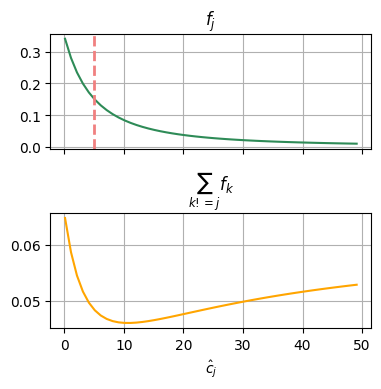

In [123]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 1, figsize=(4,4), sharex=True)


axs[0].plot(x, fj_list, color="seagreen")
axs[0].axvline(x=true_cj, color="lightcoral", linestyle="--", linewidth=2, label="x = 5")
axs[0].set_title("$f_j$")
axs[0].grid(True)


axs[1].plot(x, fk_sum_list, color="orange")
axs[1].set_xlabel("$\hat{c}_j$")
axs[1].set_title("$\sum_{k != j} f_k$")
axs[1].grid(True)

plt.tight_layout()


In [124]:
seller_vectors_reduced = np.delete(seller_vectors, seller_idx, axis=0)
def get_W_reduced(buyer_vectors=buyer_vectors, seller_vectors=seller_vectors,V=V, A=A, seller_idx=seller_idx):
  B = np.matrix([[np.matmul(buyer_vectors[i],seller_vectors[j]) for j in range(n_sellers)] for i in range(n_buyers) ])
  C = np.matrix([[np.matmul(seller_vectors[i],seller_vectors[j]) for j in range(n_sellers)] for i in range(n_sellers) ])
  B_reduced = np.delete(B, seller_idx, axis=1)
  C_reduced = np.delete(np.delete(C, seller_idx, axis=0), seller_idx, axis=1)
  V_reduced = np.delete(np.delete(V, seller_idx, axis=0), seller_idx, axis=1)
  A_reduced = np.delete(np.delete(A, seller_idx, axis=0), seller_idx, axis=1)
  W_reduced = np.matmul(B_reduced, LA.inv(C_reduced+V_reduced+A_reduced))
  return W_reduced

B = np.matrix([[np.matmul(buyer_vectors[i],seller_vectors[j]) for j in range(n_sellers)] for i in range(n_buyers) ])
C = np.matrix([[np.matmul(seller_vectors[i],seller_vectors[j]) for j in range(n_sellers)] for i in range(n_sellers) ])
B_reduced = np.delete(B, seller_idx, axis=1)
C_reduced = np.delete(np.delete(C, seller_idx, axis=0), seller_idx, axis=1)
V_reduced = np.delete(np.delete(V, seller_idx, axis=0), seller_idx, axis=1)
A_reduced = np.delete(np.delete(A, seller_idx, axis=0), seller_idx, axis=1)

W_reduced = get_W_reduced(buyer_vectors=buyer_vectors, seller_vectors=seller_vectors,V=V, A=A, seller_idx=seller_idx)

SC_reduced = 0
for i in range(buyer_vectors.shape[0]):
  sw_i = np.matmul(np.matmul(W_reduced[i,:], C_reduced),W_reduced[i,:].T) - \
  2*np.matmul(W_reduced[i,:],B_reduced[i,:].T) \
  + np.matmul(np.matmul(W_reduced[i,:], V_reduced+A_reduced), W_reduced[i,:].T) + np.linalg.norm(buyer_vectors[i,:])**2
  SC_reduced += sw_i.item()

In [129]:
x = np.arange(0, 20, 1)
vcg_list = []
fj_list = []
SC_ori_list = []
myerson_list = []


W_reduced = get_W_reduced(buyer_vectors=buyer_vectors, seller_vectors=seller_vectors,V=V, A=A, seller_idx=seller_idx)

for true_cost in x:
  _, fj = get_fj(seller_vectors=seller_vectors, buyer_vectors=buyer_vectors,seller_idx=seller_idx, A=A, cj = true_cost)
  fj_list.append(fj)
  SC_reduced = 0
  SC_ori = 0
  B = np.matrix([[np.matmul(buyer_vectors[i],seller_vectors[j]) for j in range(n_sellers)] for i in range(n_buyers) ])
  C = np.matrix([[np.matmul(seller_vectors[i],seller_vectors[j]) for j in range(n_sellers)] for i in range(n_sellers) ])
  B_reduced = np.delete(B, seller_idx, axis=1)
  C_reduced = np.delete(np.delete(C, seller_idx, axis=0), seller_idx, axis=1)
  W = get_W(seller_vectors=seller_vectors, buyer_vectors=buyer_vectors,V=V, A=A, cj=true_cost,seller_idx=seller_idx)
  print(W)
  for i in range(buyer_vectors.shape[0]):
    sw_i_reduced = - np.matmul(np.matmul(B_reduced[i,:], LA.inv(C_reduced +V_reduced+A_reduced)),B_reduced[i,:].T) + np.linalg.norm(buyer_vectors[i,:])**2
    # sw_i_ori = - np.matmul(np.matmul(B[i,:], LA.inv(C +V +A)),B [i,:].T) + np.linalg.norm(buyer_vectors[i,:])**2
    A_loc = A.copy()
    A_loc[seller_idx, seller_idx] = true_cost
    sw_i_ori = np.matmul(np.matmul(W, C),W.T) - \
    2*np.matmul(W,B[i,:].T) \
    + np.matmul(np.matmul(W, V+A_loc), W.T) + np.linalg.norm(buyer_vectors[i,:])**2
    SC_ori += sw_i_ori.item()
    SC_reduced += sw_i_reduced.item()
  vcg = - SC_ori + SC_reduced + true_cost * fj
  vcg_list.append(vcg)
  xx = np.arange(true_cost,500,0.1)
  yy = []
  for t in xx:
    a,b =  get_fj(seller_vectors=seller_vectors, buyer_vectors=buyer_vectors,seller_idx=seller_idx, A=A, cj = t)
    yy.append(b)
  from scipy import integrate
  int_ = integrate.simpson(y = yy, x = xx)
  myerson_list.append(int_+true_cost*fj)


# fj always decreases with cj, fk may decrease or increase with cj, depending on the signs of W entries

[[ 0.58438065  0.17885035 -0.18114374]]
[[ 0.5299781   0.18427119 -0.15719628]]
[[ 0.48484204  0.18876869 -0.13732784]]
[[ 0.44679071  0.19256024 -0.12057802]]
[[ 0.41427742  0.19579997 -0.10626599]]
[[ 0.38617517  0.19860016 -0.09389566]]
[[ 0.36164332  0.20104459 -0.08309699]]
[[ 0.34004209  0.20319701 -0.07358834]]
[[ 0.32087592  0.20510679 -0.06515158]]
[[ 0.30375504  0.20681276 -0.05761514]]
[[ 0.28836864  0.20834591 -0.0508422 ]]
[[ 0.27446585  0.20973123 -0.04472234]]
[[ 0.26184197  0.21098911 -0.03916543]]
[[ 0.25032828  0.21213637 -0.03409721]]
[[ 0.23978449  0.21318699 -0.02945595]]
[[ 0.23009301  0.21415268 -0.02518985]]
[[ 0.22115451  0.21504334 -0.02125522]]
[[ 0.21288452  0.21586739 -0.01761485]]
[[ 0.20521073  0.21663203 -0.01423692]]
[[ 0.19807093  0.21734346 -0.01109405]]


In [130]:
# a sanity check about the closed form W calculation -- seems correct

from sympy import symbols, diff, solve
from sympy.functions.elementary.exponential import exp
from sympy import log
from scipy.optimize import minimize
from sympy.utilities.lambdify import lambdify
import numpy as np


def get_w_mean_market(j=0, cj=1,A=A, V=V, seller_vectors=seller_vectors, buyer_vectors=buyer_vectors):
  # print(A)
  x, y, z = symbols('x y z')
  func = (x * seller_vectors[0] + y * seller_vectors[1] + z * seller_vectors[2] - buyer_vectors[0]).dot((x * seller_vectors[0] + y * seller_vectors[1] + z * seller_vectors[2] - buyer_vectors[0]).T) + (V[0][0]+cj) *x**2 + (V[1][1]+A[1][1])*y**2 + (V[2][2]+A[2][2])*z**2
  my_func = lambdify((x,y,z), func)
  def my_func_v(x):
    return my_func(*tuple(x))

  v = minimize(my_func_v,[1,1,1])['x']
  return v

def get_w_mean_market_reduced(j=0, cj=1,A=A, V=V, seller_vectors=seller_vectors, buyer_vectors=buyer_vectors):
  y, z = symbols('y z')
  func = (y * seller_vectors[1] + z * seller_vectors[2] - buyer_vectors[0]).dot((y * seller_vectors[1] + z * seller_vectors[2] - buyer_vectors[0]).T) +  (V[1][1]+A[1][1])*y**2 + (V[2][2]+A[2][2])*z**2
  my_func = lambdify((y,z), func)
  def my_func_v(x):
    return my_func(*tuple(x))

  v = minimize(my_func_v,[1,1])['x']
  return v

In [131]:
from numpy import linalg as LA


true_cost = 4

print(get_w_mean_market( seller_vectors=seller_vectors, buyer_vectors=buyer_vectors, j=seller_idx, cj=true_cost, A=A))

print(get_W(seller_vectors=seller_vectors, buyer_vectors=buyer_vectors,V=V, A=A, cj=true_cost,seller_idx=seller_idx))

print(get_w_mean_market_reduced( seller_vectors=seller_vectors, buyer_vectors=buyer_vectors, j=seller_idx, cj=true_cost, A=A))

print(get_W_reduced(buyer_vectors=buyer_vectors, seller_vectors=seller_vectors,V=V, A=A, seller_idx=seller_idx))

[ 0.4142774   0.19579996 -0.10626599]
[[ 0.41427742  0.19579997 -0.10626599]]
[0.23707986 0.07609479]
[[0.23707986 0.0760948 ]]


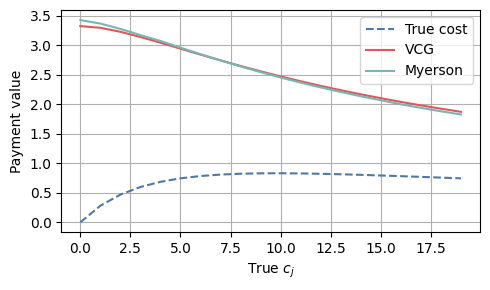

In [132]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (5,3)
colors = ["#4E79A7", "#F28E2B", "#E15759", "#76B7B2", "#59A14F", "#EDC949", "#B07AA1", "#FF9DA7"]

plt.plot(x, x*np.array(fj_list) , color=colors[0],label='True cost',linestyle="--")
plt.plot(x, np.array(vcg_list), color=colors[2],label='VCG')
plt.plot(x, np.array(myerson_list), color=colors[3],label='Myerson')
plt.ylabel('Payment value')
plt.xlabel('True $c_j$')
plt.legend()
plt.grid(True)
plt.tight_layout()


### Price of Anarchy

#### LOO payment

In [24]:
def Calculate_LOO(buyer_vectors = buyer_vectors,seller_vectors=seller_vectors, A=A, V=V, seller_idx=seller_idx, cj=cj):
  A_loc = A.copy()
  A_loc[seller_idx][seller_idx] = cj
  B = np.matrix([[np.matmul(buyer_vectors[i],seller_vectors[j]) for j in range(n_sellers)] for i in range(n_buyers) ])
  C = np.matrix([[np.matmul(seller_vectors[i],seller_vectors[j]) for j in range(n_sellers)] for i in range(n_sellers) ])
  W = get_W(seller_vectors=seller_vectors, buyer_vectors=buyer_vectors,V=V, A=A, cj=cj, seller_idx=seller_idx)
  B_reduced = np.delete(B, seller_idx, axis=1)
  C_reduced = np.delete(np.delete(C, seller_idx, axis=0), seller_idx, axis=1)
  V_reduced = np.delete(np.delete(V, seller_idx, axis=0), seller_idx, axis=1)
  SC = 0
  SC_reduced = 0
  for i in range(buyer_vectors.shape[0]):
      A_loc = A.copy()
      A_loc[seller_idx, seller_idx] = true_cost
      sc_i_ori = np.matmul(np.matmul(W, C),W.T) - \
      2*np.matmul(W,B[i,:].T) \
      + np.matmul(np.matmul(W, V), W.T) + np.linalg.norm(buyer_vectors[i,:])**2
      sc_i_reduced = np.matmul(np.matmul(W_reduced[i,:], C_reduced),W_reduced[i,:].T) - \
      2*np.matmul(W_reduced[i,:],B_reduced[i,:].T) \
      + np.matmul(np.matmul(W_reduced[i,:], V_reduced), W_reduced[i,:].T) + np.linalg.norm(buyer_vectors[i,:])**2
      SC_reduced += sc_i_reduced.item()
      SC += sc_i_ori.item()

  return SC_reduced - SC

In [25]:
def return_SW(buyer_vectors = buyer_vectors,seller_vectors=seller_vectors, A=A, V=V, seller_idx=seller_idx, cj=cj, true_cost=true_cost):
  A_loc = A.copy()
  A_loc[seller_idx][seller_idx] = cj
  B = np.matrix([[np.matmul(buyer_vectors[i],seller_vectors[j]) for j in range(n_sellers)] for i in range(n_buyers) ])
  C = np.matrix([[np.matmul(seller_vectors[i],seller_vectors[j]) for j in range(n_sellers)] for i in range(n_sellers) ])
  W = get_W(seller_vectors=seller_vectors, buyer_vectors=buyer_vectors,V=V, A=A, cj=cj, seller_idx=seller_idx)
  SC = 0
  A_true = A.copy()
  A_true[seller_idx][seller_idx] = true_cost
  for i in range(n_buyers):
    sc_i_ori = np.matmul(np.matmul(W[i,:], C),W[i,:].T) - \
    2*np.matmul(W[i,:],B[i,:].T) \
    + np.matmul(np.matmul(W[i,:], V+A_true), W[i,:].T) + np.linalg.norm(buyer_vectors[i,:])**2
  SC += sc_i_ori.item()
  return SC


In [26]:
LOO_list = []
sw_list = []
for cj in np.arange(0,20,0.1):
  LOO_payment = Calculate_LOO(buyer_vectors = buyer_vectors,seller_vectors=seller_vectors, A=A, V=V, seller_idx=seller_idx, cj=cj)
  LOO_list.append(LOO_payment)
  sw = return_SW(buyer_vectors = buyer_vectors,seller_vectors=seller_vectors, A=A, V=V, seller_idx=seller_idx, cj=cj, true_cost=5)
  sw_list.append(sw)


Text(0.5, 0, '$\\hat{c}_j$')

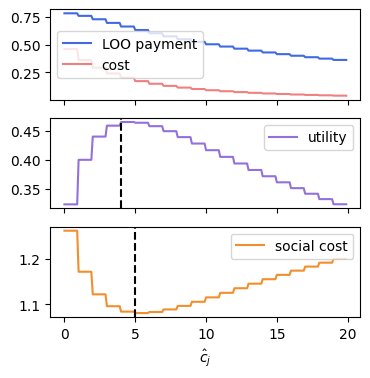

In [27]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (3,3)
colors = ["#4E79A7", "#F28E2B", "#E15759", "#76B7B2", "#59A14F", "#EDC949", "#B07AA1", "#FF9DA7"]
fig, axs = plt.subplots(3, 1, figsize=(4,4), sharex=True)
fj_list = []
x = np.arange(0, 20, 0.1)
for cj in x:
  _, fj = get_fj(seller_vectors=seller_vectors, buyer_vectors=buyer_vectors,seller_idx=seller_idx, A=A, cj = cj)
  fj_list.append(fj)
axs[0].plot(np.arange(0,20,0.1), LOO_list,color="royalblue",label='LOO payment')
axs[0].plot(np.arange(0,20,0.1), np.array(fj_list)*true_cj, color='lightcoral',label='cost')
axs[0].legend()

axs[1].plot(np.arange(0,20,0.1),LOO_list-np.array(fj_list)*true_cj,color='mediumpurple',label='utility')
axs[1].legend()
axs[1].axvline(x=np.arange(0,20,0.1)[np.argmax(LOO_list-np.array(fj_list)*true_cj)], linestyle='--', color='black')

axs[2].plot(np.arange(0,20,0.1),np.array(sw_list),color=colors[1],label='social cost')
axs[2].axvline(x=5, linestyle='--', color='black')
axs[2].legend()
plt.xlabel('$\hat{c}_j$')


In [36]:
SW_LOO = return_SW(buyer_vectors = buyer_vectors,seller_vectors=seller_vectors, A=A, V=V, seller_idx=seller_idx, cj=np.arange(0,20,0.1)[np.argmax(LOO_list-np.array(fj_list)*true_cj)], true_cost=5)
SW_opt = return_SW(buyer_vectors = buyer_vectors,seller_vectors=seller_vectors, A=A, V=V, seller_idx=seller_idx, cj=5, true_cost=5)
print(SW_LOO/SW_opt)

1.0029135361941177


#### Shapley payment

In [29]:
from itertools import chain, combinations
elements = [1,2]

def all_subsets(iterable):
    return chain.from_iterable(combinations(iterable, r) for r in range(len(iterable) + 1))
subsets = list(map(list, all_subsets(elements)))


In [30]:
import random
from math import comb

def return_shapley_value(buyer_vectors = buyer_vectors,seller_vectors=seller_vectors, A=A, V=V, seller_idx=seller_idx, cj=cj):
  A_loc = A.copy()
  A_loc[seller_idx][seller_idx] = cj
  B = np.matrix([[np.matmul(buyer_vectors[i],seller_vectors[j]) for j in range(n_sellers)] for i in range(n_buyers) ])
  C = np.matrix([[np.matmul(seller_vectors[i],seller_vectors[j]) for j in range(n_sellers)] for i in range(n_sellers) ])
  Shapley_value = 0
  for subset in subsets:
    if len(subset) >0:
      subset_plus_j = subset + [seller_idx]
      A_sub = A_loc[np.ix_(subset,subset)]
      A_sub_j = A_loc[np.ix_(subset_plus_j,subset_plus_j)]
      C_sub = C[np.ix_(subset,subset)]
      C_sub_j = C[np.ix_(subset_plus_j,subset_plus_j)]
      V_sub = V[np.ix_(subset,subset)]
      V_sub_j = V[np.ix_(subset_plus_j,subset_plus_j)]
      B_sub = B[:,subset]
      B_sub_j = B[:,subset_plus_j]
      W_sub = np.matmul(B_sub, LA.pinv(C_sub+V_sub+A_sub))
      W_sub_j = np.matmul(B_sub_j, LA.pinv(C_sub_j+V_sub_j+A_sub_j))
      SV_before = 0
      SV_after = 0
      for i in range(n_buyers):
        sw_i = np.matmul(np.matmul(W_sub[i,:], C_sub),W_sub[i,:].T) - \
        2*np.matmul(W_sub[i,:], B_sub[i,:].T) \
        + np.matmul(np.matmul(W_sub[i,:], V_sub), W_sub[i,:].T) + np.linalg.norm(buyer_vectors[i,:])**2

        sw_i_ = np.matmul(np.matmul(W_sub_j[i,:], C_sub_j),W_sub_j[i,:].T) - \
        2*np.matmul(W_sub_j[i,:], B_sub_j[i,:].T) \
        + np.matmul(np.matmul(W_sub_j[i,:], V_sub_j), W_sub_j[i,:].T) + np.linalg.norm(buyer_vectors[i,:])**2
        SV_before += sw_i
        SV_after += sw_i_
      Shapley_value += (1/comb(n_sellers-1,len(subset)) *(SV_before - SV_after))

  return (np.sum(Shapley_value))/n_sellers

In [31]:
from tqdm import tqdm
spv_list = []
for cj in tqdm(np.arange(0,20,0.1)):
  spv = return_shapley_value(buyer_vectors = buyer_vectors,seller_vectors=seller_vectors, A=A, V=V, seller_idx=seller_idx, cj=cj)
  spv_list.append(spv)

100%|██████████| 200/200 [00:00<00:00, 789.58it/s]


Text(0.5, 0, '$\\hat{c}_j$')

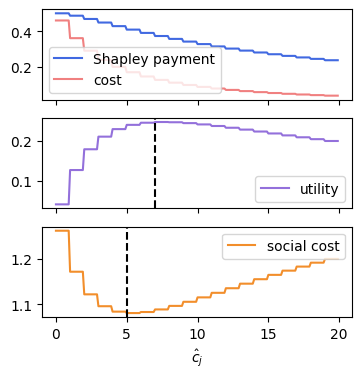

In [32]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3, 1, figsize=(4,4), sharex=True)
fj_list = []
x = np.arange(0, 20, 0.1)
for cj in x:
  _, fj = get_fj(seller_vectors=seller_vectors, buyer_vectors=buyer_vectors,seller_idx=seller_idx, A=A, cj = cj)
  fj_list.append(fj)
axs[0].plot(np.arange(0,20,0.1), spv_list, color='royalblue',label='Shapley payment')
axs[0].plot(np.arange(0,20,0.1), np.array(fj_list)*5, color='lightcoral',label='cost')

axs[0].legend()
axs[1].plot(np.arange(0,20,0.1), spv_list - np.array(fj_list)*5, color='mediumpurple',label='utility')
axs[1].axvline(x=np.arange(0,20,0.1)[np.argmax(spv_list - np.array(fj_list)*5)], linestyle='--', color='black')

axs[1].legend()
axs[2].plot(np.arange(0,20,0.1),np.array(sw_list),color=colors[1],label='social cost')
axs[2].axvline(x=5, linestyle='--', color='black')
axs[2].legend()
plt.xlabel('$\hat{c}_j$')


In [33]:
np.arange(0,20,0.1)[np.argmax(spv_list - np.array(fj_list)*5)]

np.float64(7.0)

In [37]:
SW_SP = return_SW(buyer_vectors = buyer_vectors,seller_vectors=seller_vectors, A=A, V=V, seller_idx=seller_idx, cj=np.arange(0,20,0.1)[np.argmax(spv_list - np.array(fj_list)*5)], true_cost=5)
SW_opt = return_SW(buyer_vectors = buyer_vectors,seller_vectors=seller_vectors, A=A, V=V, seller_idx=seller_idx, cj=5, true_cost=5)
print(SW_SP/SW_opt)

1.0073946981770057


## Data Mixing Laws


In [ ]:
# model-parameters
b = 0
t = [3, 3, 3]
c = [1, 3, 5]
k = 2

In [ ]:
from sympy import symbols, diff, solve
from sympy.functions.elementary.exponential import exp
from sympy import log
from scipy.optimize import minimize
from sympy.utilities.lambdify import lambdify
import numpy as np


In [40]:

def softmax(x):
    exp_x = np.exp(x - np.max(x))  # Subtract max for numerical stability
    return exp_x / np.sum(exp_x)

def get_fj_mixing(j=0, cj=1):
  c[j] = cj
  x, y, z = symbols('x y z')
  func = b + k * exp( exp(x)/(exp(x)+exp(y)+exp(z)) *t[0] +\
                   exp(y)/(exp(x)+exp(y)+exp(z))*t[1] +\
                    exp(z)/(exp(x)+exp(y)+exp(z))*t[2]) +\
                     c[0]*(exp(x)/(exp(x)+exp(y)+exp(z)))**2+\
                      c[1]*(exp(y)/(exp(x)+exp(y)+exp(z)))**2 +\
                       c[2]*(exp(z)/(exp(x)+exp(y)+exp(z)))**2
  my_func = lambdify((x,y,z), func)
  def my_func_v(x):
    return my_func(*tuple(x))

  v = minimize(my_func_v,[1,1,1])['x']
  w = softmax(v)
  return w

In [41]:

v_list = []
for cj in np.arange(0,10,0.1):
  v = get_fj_mixing(j=0, cj=cj)
  v_list.append(v)


In [42]:

true_fj = get_fj_mixing(0,cj=1)[0]**2

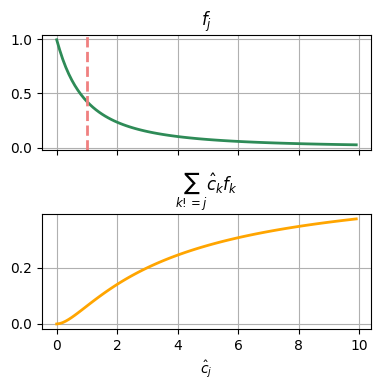

In [46]:
cj_list = np.arange(0,10,0.1)
fj_list = [v_list[i][0]**2 for i in range(len(cj_list))]
fk_sum = [v_list[i][1]**2 + v_list[i][2]**2 for i in range(len(cj_list))]
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 1, figsize=(4,4), sharex=True)

# First plot (top)
axs[0].plot(cj_list, fj_list, color="seagreen", linewidth=2)
axs[0].axvline(x=1, color="lightcoral", linestyle="--", linewidth=2, label="x = 5")
axs[0].set_title("$f_j$")
axs[0].grid(True)

# Second plot (bottom)
axs[1].plot(cj_list, np.array(fk_sum), color="orange", linewidth=2)
axs[1].set_xlabel("$\hat{c}_j$")
axs[1].set_title("$\sum_{k != j} \hat{c}_k f_k$")
axs[1].grid(True)

plt.tight_layout()
# plt.savefig(f"{images_dir}/allocation_data_mixing_market.pdf",format="pdf", bbox_inches="tight")

In [47]:
# myerson payment rule -- estimate the area under the curve
from tqdm import tqdm
xx = np.arange(1,100,0.1)
yy = []
for cj in tqdm(xx):
  fj =  get_fj_mixing(j=0, cj = cj)[0]**2
  yy.append(fj)
from scipy.integrate import simpson

P_myerson = simpson(y = yy, x = xx) + get_fj_mixing(j=0, cj = 1)[0]**2

print(P_myerson)

100%|██████████| 990/990 [00:16<00:00, 60.74it/s]


1.6136125690394818


In [50]:
# VCG payment rule
def get_fj_mixing_2(j=0, cj=1):
  c[j] = cj
  y, z = symbols('y z')
  func = b + k * exp( exp(y)/(exp(y)+exp(z))*t[1] +\
                    exp(z)/(exp(y)+exp(z))*t[2]) +\
                      c[1]*(exp(y)/(exp(y)+exp(z)))**2 +\
                       c[2]*(exp(z)/(exp(y)+exp(z)))**2
  my_func = lambdify((y,z), func)
  def my_func_v(x):
    return my_func(*tuple(x))

  v = minimize(my_func_v,[1,1])['x']
  w = softmax(v)
  return w

In [51]:
w_reduced = get_fj_mixing_2()
w = get_fj_mixing()

In [52]:
SC_reduced = b + k*np.exp(w_reduced[0]*t[1]+w_reduced[1]*t[2]) + c[1]*w_reduced[0]**2 + c[2]*w_reduced[1]**2

In [54]:
c[0] = 1
SC = b + k*np.exp(w[0]*t[0]+w[1]*t[1]+w[2]*t[2]) + c[0]*w[0]**2 + c[1]*w[1]**2 + c[2]*w[2]**2

In [55]:
P_VCG = SC_reduced - SC + c[0]*w[0]**2

In [58]:
x = np.arange(0,10,0.5)
ours_list = []
myerson_list = []
vcg_list = []
for cj in tqdm(x):
  w = get_fj_mixing(j=0, cj=cj)
  true_fj = w[0]**2
  fj_list = []
  for m in x:
    fj = get_fj_mixing(j=0, cj=m)[0]**2
    fj_list.append(fj)
  ours_list.append(np.max((x-cj)*np.array(fj_list)) + cj*true_fj)
  yy = []
  xx = np.arange(cj,20,0.1)
  for a in np.arange(cj,20,0.1):
    fj = get_fj_mixing(j=0, cj = a)[0]**2
    yy.append(fj)

  myerson = simpson(y = yy, x=xx) + cj * get_fj_mixing(j=0, cj = cj)[0]**2
  myerson_list.append(myerson)
  w = get_fj_mixing(j=0, cj=cj)
  SC = b + k*np.exp(w[0]*t[0]+w[1]*t[1]+w[2]*t[2]) + cj*w[0]**2 + c[1]*w[1]**2 + c[2]*w[2]**2
  P_VCG = SC_reduced - SC + c[0]*w[0]**2
  vcg_list.append(P_VCG)



100%|██████████| 20/20 [00:42<00:00,  2.14s/it]


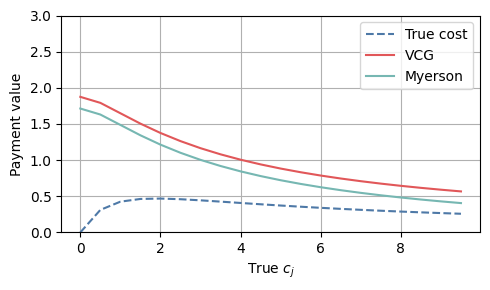

In [60]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (5,3)
colors = ["#4E79A7", "#F28E2B", "#E15759", "#76B7B2", "#59A14F", "#EDC949", "#B07AA1", "#FF9DA7"]
fj_list = [get_fj_mixing(j=0, cj=cj)[0]**2 for cj in x]
plt.plot(x, x*np.array(fj_list) , color=colors[0],label='True cost',linestyle="--")
plt.plot(x, np.array(vcg_list), color=colors[2],label='VCG')
plt.plot(x, np.array(myerson_list), color=colors[3],label='Myerson')
plt.ylabel('Payment value')
plt.xlabel('True $c_j$')
plt.legend()
plt.grid(True)
plt.ylim(0,3)
plt.tight_layout()
